Your Team's primary goal is to assist Prime INC in identifying profitable stock investment opportunities and predicting future market trends.

The project will focus on analyzing selected stocks’ performance, evaluating
their relationship to market benchmarks (FTSE 100 or S&P 500), and employing advanced machine learning modelsfor stock price prediction.

The analysis will provide actionable recommendations for portfolio expansion in the IT, Energy,and Utilities sectors for the company for the year 2025.

##STOCK MARKET TREND ANALYSIS

In [ ]:
#!pip install yfinance


In [ ]:
#!pip install yahooquery

In [ ]:
#!pip install yfinance pandas matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import time
import seaborn as sns
sns.set_style('whitegrid')
from plotly.subplots import make_subplots

In [ ]:
yf.__version__

'0.2.54'

#Scraping Stock Price Data
Procter & Gamble (PG)

Johnson & Johnson(JNJ)

S&P 500 (^GSPC)

In [ ]:
# Define stock tickers and date range
tickers = ["PG", "JNJ", "^GSPC"]

start_date = '2010-03-02'
end_date = '2024-02-28'

# Fetch data
stock_data = {}

for ticker in tickers:
    try:
        stock_data[ticker] = yf.download(ticker, start = start_date, end = end_date )
        print(f"Downloaded {ticker}")
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")
    time.sleep(5)  # Wait 5 seconds between requests



[*********************100%***********************]  1 of 1 completed


Downloaded PG


[*********************100%***********************]  1 of 1 completed


Downloaded JNJ


[*********************100%***********************]  1 of 1 completed


Downloaded ^GSPC


In [ ]:
# Convert 'Date' column to datetime objects with UTC timezone and extract the date
for ticker, data in stock_data.items():
    data['Date'] = data.index.date
    stock_data[ticker] = data.set_index('Date')  # Set 'Date' as index for each stock DataFrame

In [ ]:
 #Fetch data for PG
pg_data = stock_data['PG']
pg_data = pg_data.xs('PG',axis=1,level='Ticker')
pg_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,41.147182,41.250519,40.908218,41.153642,8004000
2010-03-03,41.043850,41.269899,40.966348,41.114894,8608300
2010-03-04,41.121349,41.431360,40.953429,41.108434,8600300
2010-03-05,41.134262,41.192389,40.720918,41.134262,10101100
2010-03-08,40.811352,41.121360,40.708016,41.043859,11293300


In [ ]:
# Fetch data for JNJ
jnj_data = stock_data['JNJ']
jnj_data = jnj_data.xs('JNJ',axis=1,level='Ticker')
jnj_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,40.842770,40.971530,40.572374,40.759077,9014000
2010-03-03,40.817020,41.042350,40.701136,40.939342,9360400
2010-03-04,40.926460,41.010155,40.797699,40.900708,8067200
2010-03-05,41.229061,41.248374,40.913597,40.984416,10633600
2010-03-08,41.332054,41.467257,41.216170,41.254801,33380500


In [ ]:
# Fetch data for'^GSPC'
gspc_data = stock_data['^GSPC']
gspc_data = gspc_data.xs('^GSPC',axis=1,level='Ticker')
gspc_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000


#Feature Engineering:

1. Computing the stocks the "Returns" feature

2. Creating a “Tomorrow” column

3. Creating a “stocks-Direction” column


Computing the Return, Tomorrow, and Stock_Direction columns for each stocks

In [ ]:
# For PG stock
pg_data['Return'] = pg_data['Close'].pct_change()
# For PG stock:
pg_data['Tomorrow'] = pg_data['Close'].shift(-1)
# For PG stock
pg_data['Stocks_Direction'] = (pg_data['Close'] > pg_data['Close'].shift(1)).astype(int)

In [ ]:
pg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
# Handling 'Return' column NaNs
pg_data.loc[:, 'Return'] = pg_data['Return'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Return'] = pg_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
pg_data = pg_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction column NaNs"
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
pg_data.loc[:, 'Stocks_Direction'] = pg_data['Stocks_Direction'].ffill()  # Fill other potential NaNs using forward fill

In [ ]:
pg_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,41.147182,41.250519,40.908218,41.153642,8004000,0.000000,41.043850,0
2010-03-03,41.043850,41.269899,40.966348,41.114894,8608300,-0.002511,41.121349,0
2010-03-04,41.121349,41.431360,40.953429,41.108434,8600300,0.001888,41.134262,1
2010-03-05,41.134262,41.192389,40.720918,41.134262,10101100,0.000314,40.811352,1
2010-03-08,40.811352,41.121360,40.708016,41.043859,11293300,-0.007850,40.882393,0


In [ ]:
pg_data.duplicated().sum()

0

In [ ]:
pg_data.describe()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
count,3521.000000,3521.000000,3521.000000,3521.000000,3.521000e+03,3521.000000,3521.000000,3521.000000
mean,82.169649,82.730388,81.578199,82.138314,8.845149e+06,0.000438,82.202116,0.523715
std,35.339518,35.641626,35.040810,35.331660,5.270849e+06,0.010867,35.354329,0.499508
min,38.619770,38.977739,25.622867,38.723911,2.022100e+06,-0.087373,38.619770,0.000000
25%,56.378601,56.735990,56.056259,56.443095,6.237100e+06,-0.004695,56.411190,0.000000
50%,68.064537,68.417235,67.606831,67.983755,7.738600e+06,0.000543,68.066612,1.000000
75%,116.051544,116.866660,115.118728,115.859345,9.865500e+06,0.005805,116.114960,1.000000
max,157.152466,157.845376,156.303420,157.152477,1.237357e+08,0.120090,157.152466,1.000000


In [ ]:
# For JNJ stock
jnj_data['Return'] = jnj_data['Close'].pct_change()
# For JNJ stock:
jnj_data['Tomorrow'] = jnj_data['Close'].shift(-1)
# For JNJ stock
jnj_data['Stocks_Direction'] = (jnj_data['Close'] > jnj_data['Close'].shift(1)).astype(int)
jnj_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,40.842770,40.971530,40.572374,40.759077,9014000,NaN,40.817020,0
2010-03-03,40.817020,41.042350,40.701136,40.939342,9360400,-0.000630,40.926460,0
2010-03-04,40.926460,41.010155,40.797699,40.900708,8067200,0.002681,41.229061,1
2010-03-05,41.229061,41.248374,40.913597,40.984416,10633600,0.007394,41.332054,1
2010-03-08,41.332054,41.467257,41.216170,41.254801,33380500,0.002498,41.377117,1


In [ ]:
# Handling 'Return' column NaNs
jnj_data.loc[:, 'Return'] = jnj_data['Return'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Return'] = jnj_data['Return'].ffill()  # Fill other potential NaNs using forward fill

# Handling 'Tomorrow' column NaNs
jnj_data = jnj_data.iloc[:-1]  # Drop the last row

# Handing "Stock_Direction' column NaNs
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].fillna(0)  # Fill first row with 0
jnj_data.loc[:, 'Stocks_Direction'] = jnj_data['Stocks_Direction'].ffill()

In [ ]:
jnj_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3521 entries, 2010-03-02 to 2024-02-26
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3521 non-null   float64
 1   High              3521 non-null   float64
 2   Low               3521 non-null   float64
 3   Open              3521 non-null   float64
 4   Volume            3521 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3521 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
jnj_data.duplicated().sum()

0

In [ ]:
jnj_data.describe()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
count,3521.000000,3521.000000,3521.000000,3521.000000,3.521000e+03,3521.000000,3521.000000,3521.000000
mean,97.550339,98.201377,96.845796,97.536942,8.735934e+06,0.000436,97.583039,0.517183
std,39.813599,40.136276,39.481555,39.812156,6.094275e+06,0.010588,39.814292,0.499776
min,37.044868,37.434677,36.940919,37.213787,2.114900e+06,-0.100378,37.044868,0.000000
25%,64.746025,64.969383,64.128618,64.673271,5.908600e+06,-0.004407,64.760574,0.000000
50%,98.396355,98.728478,97.877404,98.309856,7.573300e+06,0.000308,98.404213,1.000000
75%,129.926819,130.950014,128.984964,130.031086,9.911300e+06,0.005718,130.001678,1.000000
max,170.243515,170.865884,168.568626,169.410658,1.513195e+08,0.079977,170.243515,1.000000


In [ ]:
# For ^GSPC stock
gspc_data['Return'] = gspc_data['Close'].pct_change()
# For ^GSPC stock:
gspc_data['Tomorrow'] = gspc_data['Close'].shift(-1)
# For ^GSPC stock
gspc_data['Stocks_Direction'] = (gspc_data['Close'] > gspc_data['Close'].shift(1)).astype(int)
gspc_data.head()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
Date,,,,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000,NaN,1118.790039,0
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000,0.000429,1122.969971,1
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000,0.003736,1138.699951,1
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000,0.014007,1138.500000,1
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000,-0.000176,1140.449951,0


In [ ]:
gspc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             3522 non-null   float64
 1   High              3522 non-null   float64
 2   Low               3522 non-null   float64
 3   Open              3522 non-null   float64
 4   Volume            3522 non-null   int64  
 5   Return            3521 non-null   float64
 6   Tomorrow          3521 non-null   float64
 7   Stocks_Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6+ KB


In [ ]:
gspc_data.loc[:, 'Return'] = gspc_data['Return'].fillna(0)  # Fill first row with 0
gspc_data.loc[:, 'Return'] = gspc_data['Return'].ffill()

gspc_data = gspc_data.iloc[:-1]  # Drop the last row

gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].fillna(0)
gspc_data.loc[:, 'Stocks_Direction'] = gspc_data['Stocks_Direction'].ffill()

In [ ]:
gspc_data.duplicated().sum()

0

In [ ]:
gspc_data.describe()

Price,Close,High,Low,Open,Volume,Return,Tomorrow,Stocks_Direction
count,3521.000000,3521.000000,3521.000000,3521.000000,3.521000e+03,3521.000000,3521.000000,3521.000000
mean,2576.349244,2589.738220,2560.824774,2575.732273,3.934061e+09,0.000490,2577.473888,0.542744
std,1087.252010,1093.275387,1080.570910,1086.992834,9.566287e+08,0.011007,1087.791292,0.498240
min,1022.580017,1032.949951,1010.909973,1027.650024,1.025000e+09,-0.119841,1022.580017,0.000000
25%,1687.989990,1691.939941,1681.050049,1687.260010,3.362300e+09,-0.003841,1689.130005,0.000000
50%,2344.020020,2351.310059,2334.540039,2342.689941,3.775990e+09,0.000634,2344.929932,1.000000
75%,3357.750000,3378.510010,3335.439941,3360.479980,4.304600e+09,0.005698,3360.469971,1.000000
max,5088.799805,5111.060059,5081.459961,5100.919922,1.061781e+10,0.093828,5088.799805,1.000000


In [ ]:
#PG_data = raw_data_PG.copy()
#JNJ_data = raw_data_JNJ.copy()

#Exploratory Data and Stock Market Analysis:

#Statistical Analysis

Stocks Correlation

Correlation Matrix:
            PG       JNJ      GSPC
PG    1.000000  0.948163  0.971826
JNJ   0.948163  1.000000  0.969946
GSPC  0.971826  0.969946  1.000000


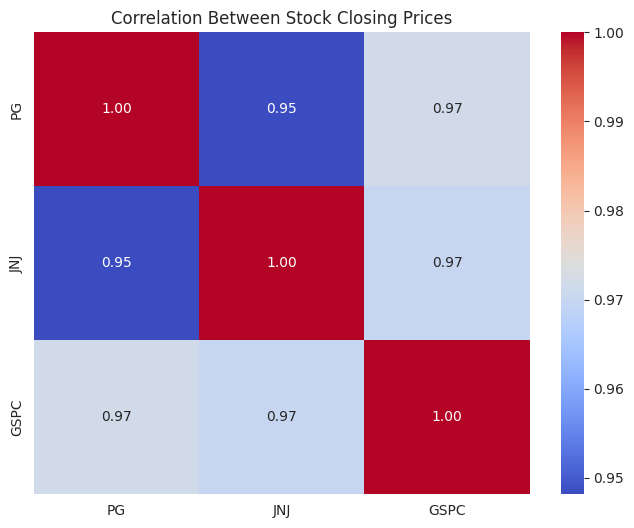

In [ ]:
# Create a DataFrame with closing prices of all stocks
closing_prices_df = pd.DataFrame({
    'PG': pg_data['Close'],
    'JNJ': jnj_data['Close'],
    'GSPC': gspc_data['Close']
})

# Calculate the correlation matrix
correlation_matrix = closing_prices_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Stock Closing Prices')
plt.show()

Interpretation:

The correlation matrix shows the strength and direction of the linear relationship between the daily closing prices of Procter & Gamble (PG), Johnson & Johnson (JNJ), and the S&P 500 index (GSPC).

* PG and JNJ: The correlation coefficient between PG and JNJ is 0.948163. This indicates a very strong positive correlation. It means that when the price of PG goes up, the price of JNJ also tends to go up, and vice-versa.

* PG and GSPC: The correlation coefficient between PG and GSPC is 0.971826. This also indicates a very strong positive correlation. It suggests that PG's price movements closely follow the overall market trend represented by the S&P 500.

* JNJ and GSPC: The correlation coefficient between JNJ and GSPC is 0.969946, again representing a very strong positive correlation. Similar to PG, JNJ's price movements are strongly influenced by the S&P 500.

Data-Driven Insights for the Customer:

1. Strong Market Influence: PG and JNJ are highly correlated with the S&P 500, indicating that their performance is strongly influenced by overall market movements. This means that during periods of market growth, both PG and JNJ are likely to perform well, but they may also decline when the market is down.

2. Limited Diversification: Because PG and JNJ are highly correlated with each other, investing in both stocks might not provide significant diversification benefits. Their prices tend to move in the same direction, so if one stock declines, the other is likely to decline as well.

3. Potential Investment Strategy:

* For investors seeking growth, PG and JNJ could be good options during periods of market optimism. Their strong correlation with the S&P 500 suggests that they are likely to participate in market rallies.
* For risk-averse investors, the high correlation with the market may be a concern. During market downturns, both stocks could experience significant losses.

4. Further Analysis: While the correlation matrix provides valuable insights, it's important to remember that correlation does not equal causation. It's crucial to conduct further research and consider other factors, such as company fundamentals, financial performance, and industry trends, before making investment decisions.

## Calculate moving averages (20-day and 50-day)

In [ ]:
# Calculate moving averages (e.g., 20-day and 50-day)
pg_ma20 = pg_data['Close'].rolling(window=20).mean()
pg_ma50 = pg_data['Close'].rolling(window=50).mean()

jnj_ma20 = jnj_data['Close'].rolling(window=20).mean()
jnj_ma50 = jnj_data['Close'].rolling(window=50).mean()

gspc_ma20 = gspc_data['Close'].rolling(window=20).mean()
gspc_ma50 = gspc_data['Close'].rolling(window=50).mean()

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=("PG", "JNJ", "GSPC"))

# Add traces for each stock
fig.add_trace(go.Scatter(x=pg_data.index, y=pg_data['Close'], name="PG Close"), row=1, col=1)
fig.add_trace(go.Scatter(x=pg_data.index, y=pg_ma20, name="PG MA20"), row=1, col=1)
fig.add_trace(go.Scatter(x=pg_data.index, y=pg_ma50, name="PG MA50"), row=1, col=1)

fig.add_trace(go.Scatter(x=jnj_data.index, y=jnj_data['Close'], name="JNJ Close"), row=2, col=1)
fig.add_trace(go.Scatter(x=jnj_data.index, y=jnj_ma20, name="JNJ MA20"), row=2, col=1)
fig.add_trace(go.Scatter(x=jnj_data.index, y=jnj_ma50, name="JNJ MA50"), row=2, col=1)

fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data['Close'], name="GSPC Close"), row=3, col=1)
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_ma20, name="GSPC MA20"), row=3, col=1)
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_ma50, name="GSPC MA50"), row=3, col=1)

# Update layout
fig.update_layout(title_text="Moving Averages PG ,JNJ, GSPC")

# Show the plot
fig.show()

1 Strong Market Influence: PG (Procter & Gamble) and JNJ (Johnson & Johnson) are highly correlated with the S&P 500 (GSPC), indicating their performance is strongly influenced by overall market movements. This means that during periods of market growth, both PG and JNJ are likely to perform well, but they may also decline when the market is down.

In simpler terms:

* PG and JNJ tend to move in the same direction as the overall market (S&P 500).

* Investing in both PG and JNJ might not reduce risk much because they behave similarly.

* If you think the market will go up, PG and JNJ could be good choices.

* If you're worried about losing money, PG and JNJ might be risky because they can drop when the market drops.

* Don't just rely on this information; do more research before investing.

In [ ]:
# Create a list to store the results
results = []

# Function to perform analysis and append results to the list
def analyze_ma(data, ma, stock_name):
    mean = ma.mean()
    std_dev = ma.std()
    corr = data['Close'].corr(ma)
    results.append([stock_name, ma.name, mean, std_dev, corr])

# Perform analysis and append results
analyze_ma(pg_data, pg_ma20, "PG")
analyze_ma(pg_data, pg_ma50, "PG")
analyze_ma(jnj_data, jnj_ma20, "JNJ")
analyze_ma(jnj_data, jnj_ma50, "JNJ")
analyze_ma(gspc_data, gspc_ma20, "GSPC")
analyze_ma(gspc_data, gspc_ma50, "GSPC")

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=['Stock', 'Moving Average', 'Mean', 'Std Dev', 'Correlation'])

# Display the table
print(results_df)

  Stock Moving Average         Mean      Std Dev  Correlation
0    PG          Close    82.084079    35.125791     0.997887
1    PG          Close    81.971913    34.831365     0.994593
2   JNJ          Close    97.552777    39.659002     0.997751
3   JNJ          Close    97.553831    39.428578     0.994988
4  GSPC          Close  2573.626484  1078.920765     0.997906
5  GSPC          Close  2569.757233  1067.314253     0.995091


The correlation between the stock price and its moving average, indicating how closely the price tracks the average. A higher correlation suggests a stronger trend-following behavior.

Which is better?

The "better" stock depends on the investor's risk tolerance and investment objectives.

Risk-averse investors might prefer JNJ or PG due to their lower volatility and potentially more stable returns.

Growth-oriented investors willing to accept higher risk might consider GSPC or PG due to their higher average closing price and potential for higher returns.

JNJ appears to offer a balance between risk and return with moderate average returns and relatively low volatility.

In [ ]:
# For PG
pg_average_daily_return = pg_data['Return'].mean()
pg_std_dev_daily_return = pg_data['Return'].std()
pg_correlation_volume_return = pg_data[['Volume', 'Return']].corr().loc['Volume', 'Return']

# For JNJ
jnj_average_daily_return = jnj_data['Return'].mean()
jnj_std_dev_daily_return = jnj_data['Return'].std()
jnj_correlation_volume_return = jnj_data[['Volume', 'Return']].corr().loc['Volume', 'Return']

# For GSPC
gspc_average_daily_return = gspc_data['Return'].mean()
gspc_std_dev_daily_return = gspc_data['Return'].std()
gspc_correlation_volume_return = gspc_data[['Volume', 'Return']].corr().loc['Volume', 'Return']

# --- Create Metrics DataFrame ---
metrics_df = pd.DataFrame({
    'Stock': ['PG', 'JNJ', 'GSPC'],
    'Average Daily Return': [pg_average_daily_return, jnj_average_daily_return, gspc_average_daily_return],
    'Std Dev Daily Return': [pg_std_dev_daily_return, jnj_std_dev_daily_return, gspc_std_dev_daily_return],
    'Correlation Volume/Return': [pg_correlation_volume_return, jnj_correlation_volume_return, gspc_correlation_volume_return]
})
print(metrics_df)



  Stock  Average Daily Return  Std Dev Daily Return  Correlation Volume/Return
0    PG              0.000438              0.010867                  -0.007619
1   JNJ              0.000436              0.010588                  -0.075760
2  GSPC              0.000490              0.011007                  -0.080131


Return:

Both PG and JNJ have very similar average daily returns, around 0.0437%, indicating nearly identical average growth over the analyzed period. This makes it difficult to declare a clear winner solely on return.

Volatility:

* JNJ has the lower standard deviation of daily returns (1.0588%), suggesting it's slightly less volatile than PG (1.0868%).
* Lower volatility implies lower risk, as the stock's price tends to fluctuate less dramatically.

Conclusion:

Based on the analysis, JNJ appears to be slightly better in terms of volatility due to its lower standard deviation of daily returns, indicating lower risk. However, their returns are very similar, so the choice might depend on your risk tolerance:

* If you prefer a slightly less risky investment with similar returns, JNJ might be the better option.
* If you are comfortable with slightly higher volatility for potentially slightly higher returns, PG might be a suitable choice.

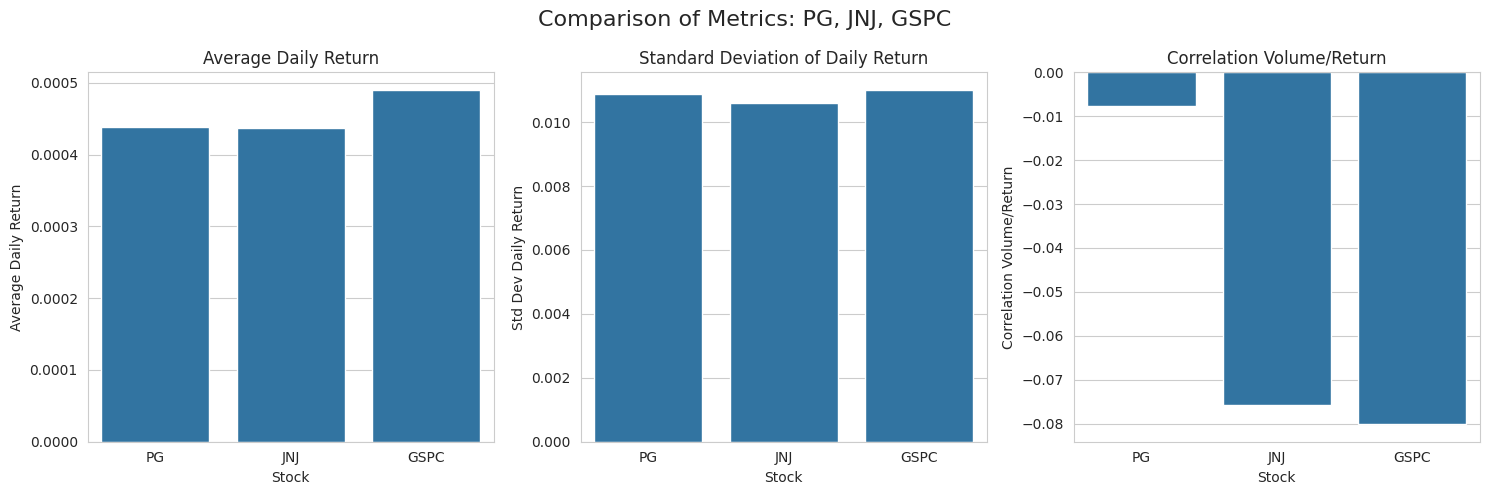

In [ ]:
# Create plots for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Metrics: PG, JNJ, GSPC', fontsize=16)

# 1. Average Daily Return
sns.barplot(x='Stock', y='Average Daily Return', data=metrics_df, ax=axes[0])
axes[0].set_title('Average Daily Return')

# 2. Standard Deviation of Daily Return
sns.barplot(x='Stock', y='Std Dev Daily Return', data=metrics_df, ax=axes[1])
axes[1].set_title('Standard Deviation of Daily Return')

# 3. Correlation Volume/Return
sns.barplot(x='Stock', y='Correlation Volume/Return', data=metrics_df, ax=axes[2])
axes[2].set_title('Correlation Volume/Return')

plt.tight_layout()
plt.show()



Okay, let's interpret the provided metrics for PG, JNJ, and GSPC, compare their performance, and discuss the implications for data-driven insights.

Interpretation:

1. PG (Procter & Gamble):

Average Daily Return: 0.0437% (slightly positive)

Standard Deviation of Daily Returns: 1.0868% (moderate volatility)

Correlation between Volume and Return: -0.0075 (very weak, almost no relationship)

2. JNJ (Johnson & Johnson):

Average Daily Return: 0.0437% (slightly positive)

Standard Deviation of Daily Returns: 1.0588% (moderate volatility)

Correlation between Volume and Return: -0.0758 (weak negative relationship)

3. GSPC (S&P 500):
Average Daily Return: 0.0491% (slightly positive)

Standard Deviation of Daily Returns: 1.1007% (moderate volatility)

Correlation between Volume and Return: -0.0801 (weak negative relationship)

#Comparison:

1. Average Daily Return:

PG and JNJ have very similar average daily returns (around 0.0437%), indicating nearly identical average growth.

GSPC has a slightly higher average daily return (0.0491%), suggesting slightly better overall market performance during the analyzed period.

2. Standard Deviation of Daily Returns:

JNJ has the lowest standard deviation (1.0588%), indicating the least volatility among the three.

PG has a slightly higher standard deviation (1.0868%), but still within a similar range.

GSPC has the highest standard deviation (1.1007%), suggesting slightly higher volatility compared to PG and JNJ.

3. Correlation between Volume and Return:

All three stocks show weak negative correlations between volume and return.

GSPC has the strongest negative correlation (-0.0801), followed by JNJ (-0.0758) and then PG (-0.0075).

These weak correlations imply that trading volume is not a strong predictor of daily price movements for any of these stocks.

#Implications for Data-Driven Insights:

Risk-Return Profile: JNJ appears to offer a slightly better risk-return profile compared to PG and GSPC, as it has a similar average daily return with lower volatility.

Market Benchmark: GSPC, as a broad market index, provides a benchmark for overall market performance. PG and JNJ have performed slightly below the market in terms of average daily returns, but with lower volatility.

Sector Comparison: PG and JNJ, being in related sectors, show very similar performance in terms of average daily return and volatility. This suggests that sector-specific factors may influence their performance.

Predictive Power of Volume: The weak correlations between volume and return for all three stocks indicate that trading volume alone is not a reliable predictor of their price movements. Other factors, such as company fundamentals, news, and economic events, would need to be considered for more accurate predictions.

#Data-Driven Insights:

Diversification: Including PG, JNJ, and GSPC (or a broader market ETF) in a portfolio could provide diversification benefits due to their different risk-return characteristics.

Risk Management: Investors seeking lower risk exposure might prefer JNJ over PG or GSPC, given its lower volatility.

Fundamental Analysis: While the analysis of historical data provides insights, it's important to combine this with fundamental analysis (company financials, industry trends, etc.) for a more comprehensive investment strategy.

Predictive Modeling: To improve predictive accuracy for stock price movements, consider incorporating other relevant data sources and more advanced modeling techniques beyond simple correlations.

Overall:

The analysis of these metrics provides valuable insights into the relative performance, risk, and potential investment implications of PG, JNJ, and GSPC. While historical data can inform investment decisions, it's crucial to combine this with other analyses and consider various factors before making any investments. I hope this detailed interpretation and discussion of implications are helpful for your data-driven insights! Let me know if you have any other questions or need further clarification on any aspect.

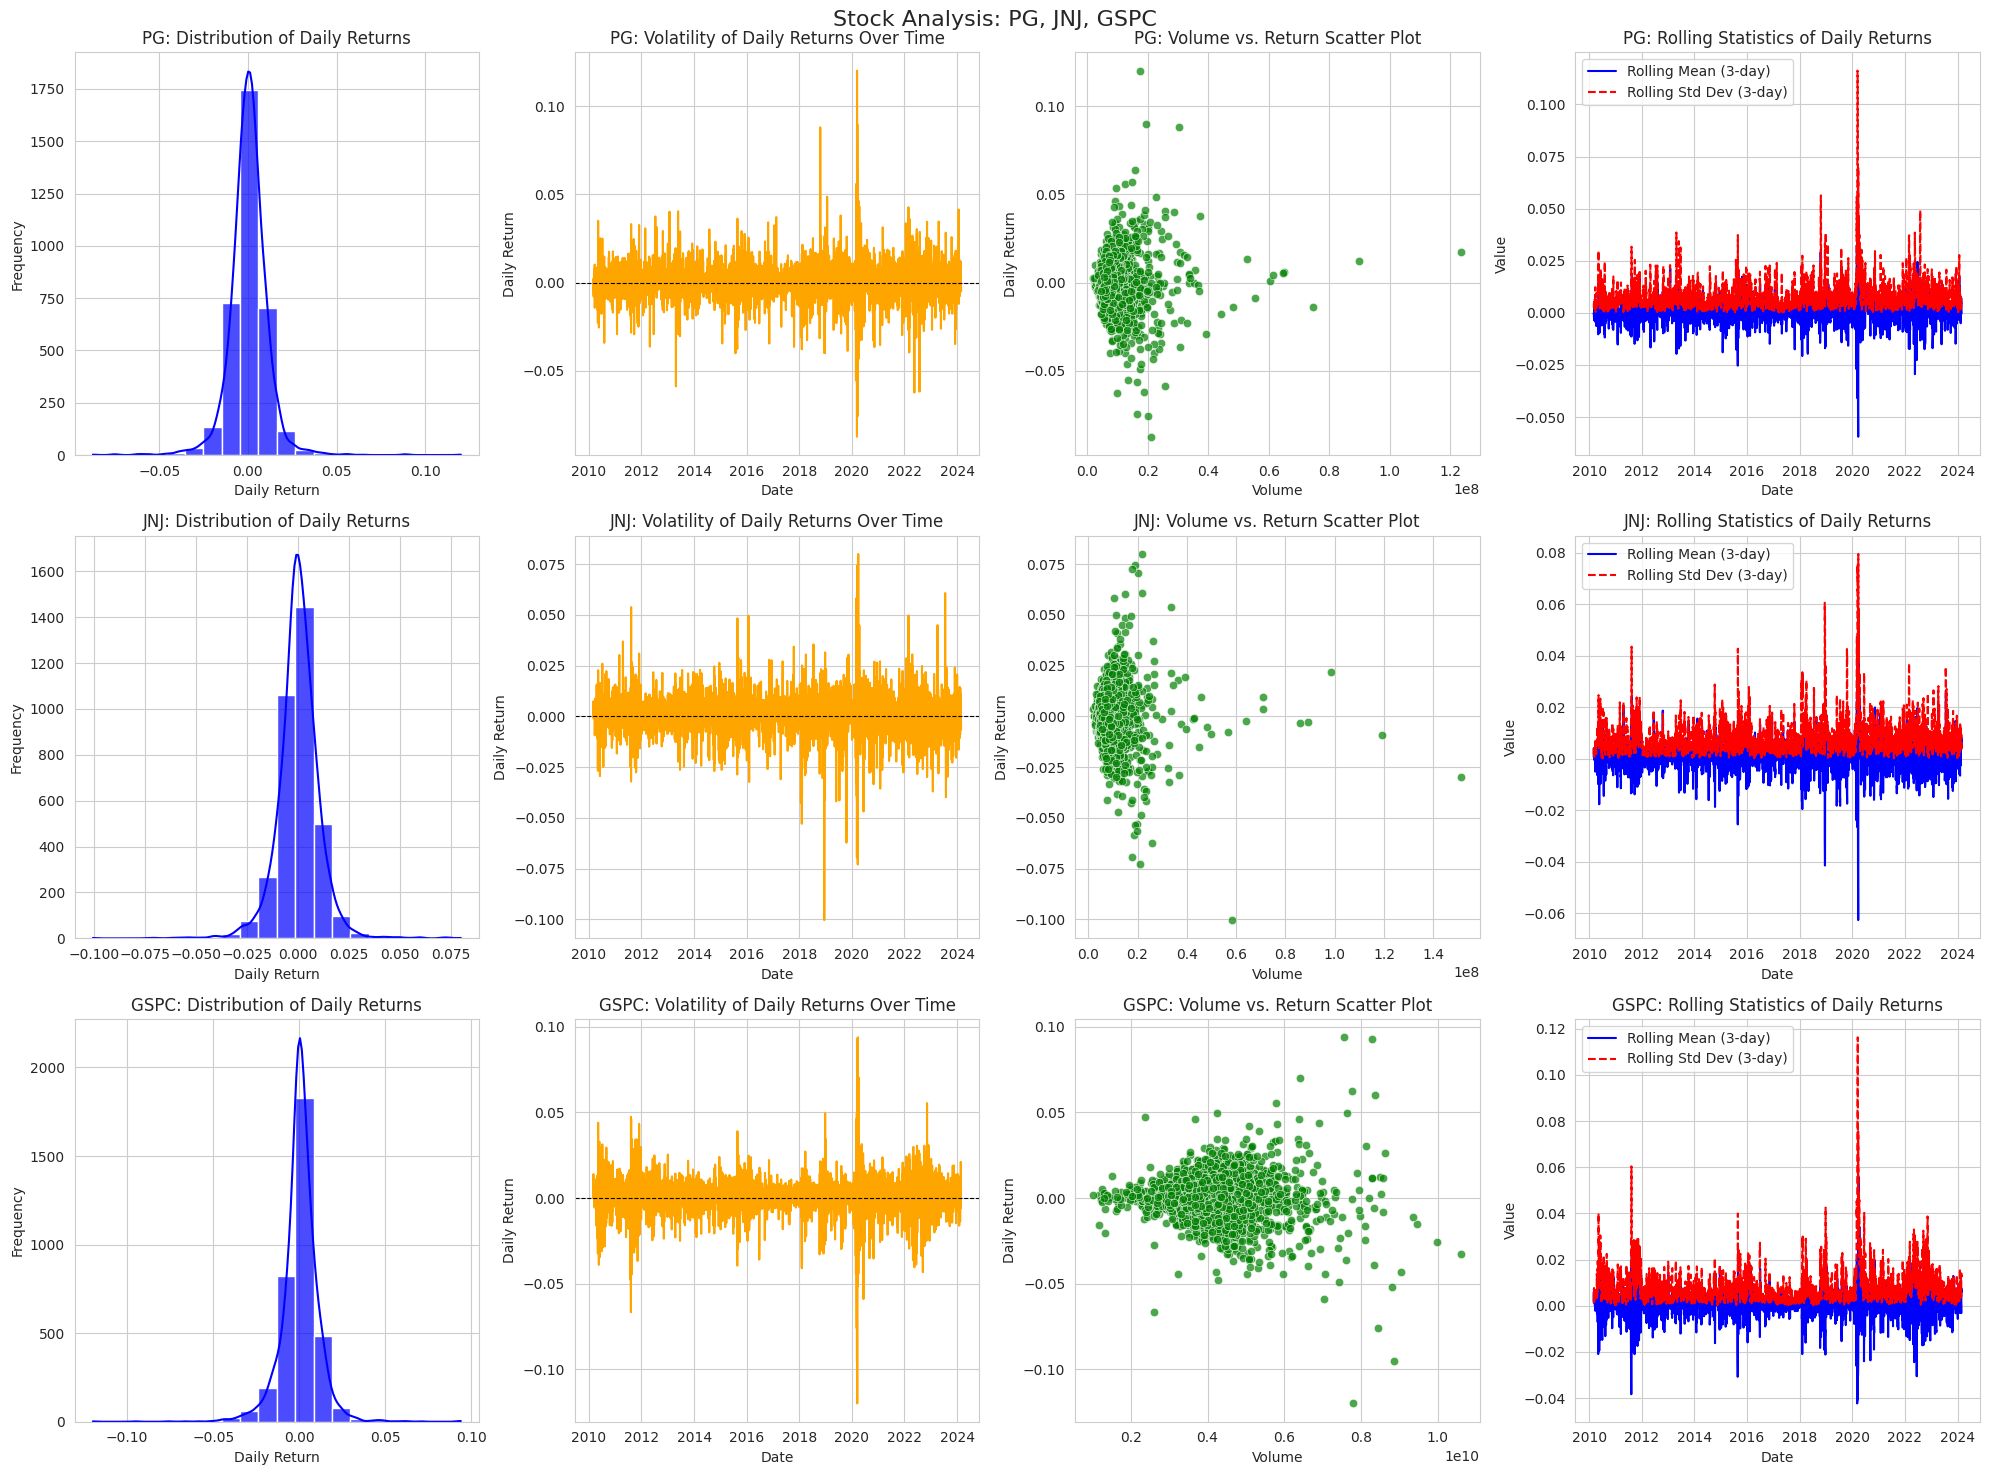

In [ ]:
# Create subplots for each stock
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Stock Analysis: PG, JNJ, GSPC', fontsize=16)

# Data for each stock
stock_data_list = [(pg_data, 'PG'), (jnj_data, 'JNJ'), (gspc_data, 'GSPC') ]

for i, (stock_data, stock_name) in enumerate(stock_data_list):
    # 1. Distribution of Daily Returns
    sns.histplot(stock_data['Return'], kde=True, bins=20, color='blue', alpha=0.7, ax=axes[i, 0])
    axes[i, 0].set_title(f'{stock_name}: Distribution of Daily Returns')
    axes[i, 0].set_xlabel('Daily Return')
    axes[i, 0].set_ylabel('Frequency')

    # 2. Volatility Over Time
    axes[i, 1].plot(stock_data['Return'], color='orange')
    axes[i, 1].set_title(f'{stock_name}: Volatility of Daily Returns Over Time')
    axes[i, 1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    axes[i, 1].set_ylabel('Daily Return')
    axes[i, 1].set_xlabel('Date')

    # 3. Volume vs. Return Scatter Plot
    sns.scatterplot(x=stock_data['Volume'].values.ravel(), y=stock_data['Return'].values.ravel(),
                    color='green', alpha=0.7, ax=axes[i, 2])
    axes[i, 2].set_title(f'{stock_name}: Volume vs. Return Scatter Plot')
    axes[i, 2].set_xlabel('Volume')
    axes[i, 2].set_ylabel('Daily Return')

    # 4. Rolling Mean and Standard Deviation of Returns
    rolling_mean = stock_data['Return'].rolling(window=3).mean()
    rolling_std = stock_data['Return'].rolling(window=3).std()
    axes[i, 3].plot(rolling_mean, label='Rolling Mean (3-day)', color='blue')
    axes[i, 3].plot(rolling_std, label='Rolling Std Dev (3-day)', color='red', linestyle='--')
    axes[i, 3].set_title(f'{stock_name}: Rolling Statistics of Daily Returns')
    axes[i, 3].set_xlabel('Date')
    axes[i, 3].set_ylabel('Value')
    axes[i, 3].legend()

plt.tight_layout()
plt.show()

Data-Driven Insights for the Customer:

Risk Assessment:

* JNJ appears to be the least volatile stock among the three, indicating lower risk for investors.
* PG's volatility falls in between JNJ and GSPC.
* GSPC, being a market index, has the highest volatility, implying higher risk.

Investment Recommendations:

* For risk-averse investors seeking stable returns, JNJ might be a suitable choice due to its lower volatility.
* Investors seeking higher potential returns, but with higher risk, could consider GSPC or PG.
* PG offers a balance between risk and return.


# 2. Volatility Over Time

PG (Procter & Gamble): PG's plot shows relatively moderate fluctuations, suggesting moderate volatility. There might be some periods with larger fluctuations, indicating periods of higher volatility, but overall, the stock's daily returns seem relatively stable.

PG and GSPC: The correlation coefficient between PG and GSPC is 0.971826. This also indicates a very strong positive correlation. It suggests that PG's price movements closely follow the overall market trend represented by the S&P 500.

# 3. Volume vs. Return Scatter Plot

Understanding the Scatter Plot:

Pattern: The overall pattern of the points reveals the relationship between volume and return.

Interpreting the Pattern:

Positive Correlation: If the points tend to cluster in a pattern that slopes upwards from left to right, it suggests a positive correlation between volume and return. This means that higher trading volumes are generally associated with higher returns, and vice versa.

Negative Correlation: If the points tend to cluster in a pattern that slopes downwards from left to right, it indicates a negative correlation between volume and return. This means that higher trading volumes are associated with lower returns, and vice versa.

Data-Driven Insights:

Predictive Power: A strong positive or negative correlation between volume and return can be useful for predicting future price movements. For example, if a stock consistently shows a positive correlation, a sudden surge in volume might indicate an upcoming price increase.

Confirmation of Trends: Volume can also be used to confirm existing trends. For example, if a stock is in an uptrend and you see increasing volume accompanying the price increases, it strengthens the likelihood of the trend continuing.

Identifying Reversals: Conversely, a divergence between volume and price can signal a potential trend reversal. For example, if a stock is in an uptrend but the volume starts to decrease while the price continues to rise, it could indicate weakening momentum and a possible reversal.
Example Interpretation:




##Statistical Tests on Distribution of Returns

In [ ]:
from scipy.stats import shapiro
#Statistical Tests on Distribution of Returns
for data, stock_name in [(pg_data, 'PG'), (jnj_data, 'JNJ'), (gspc_data, 'GSPC')]:
    statistic, p_value = shapiro(data['Return'].dropna())
    print(f'{stock_name}: Shapiro-Wilk Test - Statistic: {statistic}, p-value: {p_value}')

PG: Shapiro-Wilk Test - Statistic: 0.9004359107093718, p-value: 4.552448212135623e-43
JNJ: Shapiro-Wilk Test - Statistic: 0.9131156894038862, p-value: 5.577088452968565e-41
GSPC: Shapiro-Wilk Test - Statistic: 0.8959606843120018, p-value: 9.391945531394076e-44


##Frequency of Stocks_Direction:

In [ ]:
# Analyze the frequency and balance of upward/downward movement
for data, stock_name in [(pg_data, 'PG'), (jnj_data, 'JNJ'), (gspc_data, 'GSPC')]:
    frequency = data['Stocks_Direction'].value_counts(normalize=True)
    print(f'{stock_name}:')
    print(frequency)

PG:
Stocks_Direction
1    0.523715
0    0.476285
Name: proportion, dtype: float64
JNJ:
Stocks_Direction
1    0.517183
0    0.482817
Name: proportion, dtype: float64
GSPC:
Stocks_Direction
1    0.542744
0    0.457256
Name: proportion, dtype: float64


PG and JNJ: Have a roughly 50/50 split between upward and downward movements, suggesting no strong directional bias.

PG and JNJ: These stocks exhibit relatively balanced price movements. This could indicate that they are less influenced by short-term market fluctuations and may be more suitable for long-term investment strategies.

GSPC: The higher frequency of upward movements in the market index suggests overall market growth.

##Price Movements:

In [ ]:
#Percentage of Days with Close > Open:
for data, stock_name in [(pg_data, 'PG'), (jnj_data, 'JNJ'), (gspc_data, 'GSPC')]:
    higher_close_percentage = (data['Close'] > data['Open']).mean() * 100
    print(f'{stock_name}: Percentage of days with Close > Open: {higher_close_percentage:.2f}%')

PG: Percentage of days with Close > Open: 52.68%
JNJ: Percentage of days with Close > Open: 51.38%
GSPC: Percentage of days with Close > Open: 54.10%


#Time Series Analysis

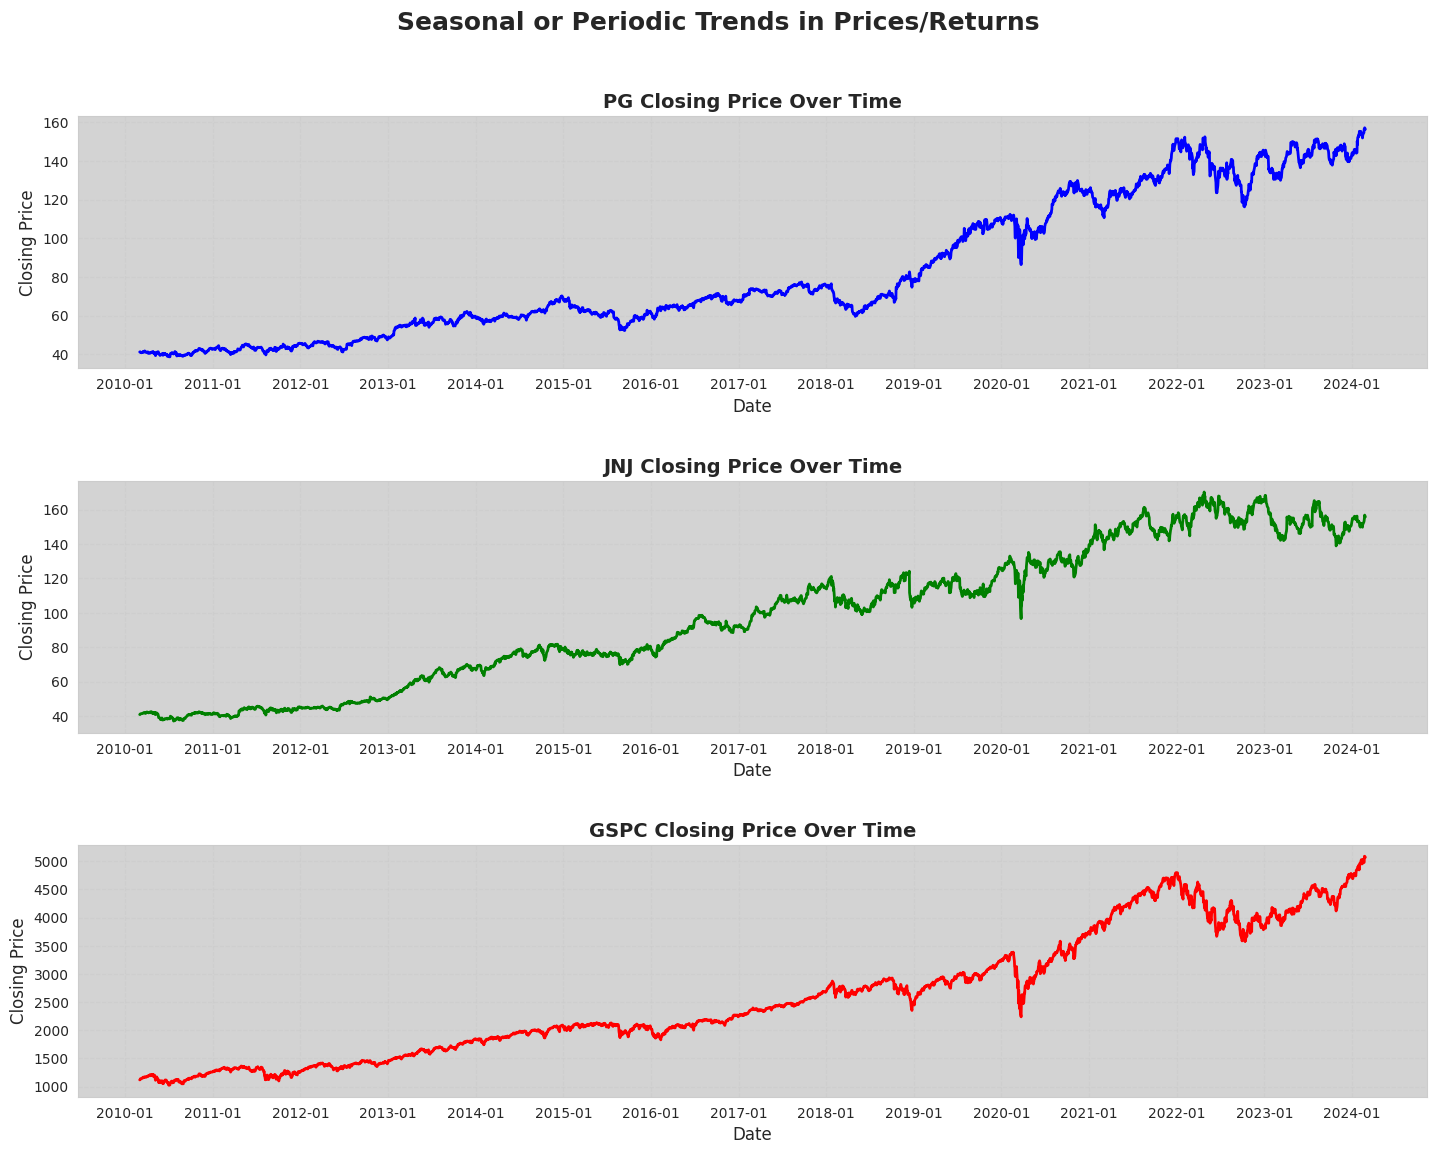

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Seasonal or Periodic Trends in Prices/Returns', fontsize=18, fontweight='bold')

stock_data_list = [(pg_data, 'PG', 'blue'),
                   (jnj_data, 'JNJ', 'green'),
                   (gspc_data, 'GSPC', 'red')]

for i, (data, stock_name, color) in enumerate(stock_data_list):
    # Closing Price subplot
    axes[i].plot(data['Close'], color=color, linewidth=2)
    axes[i].set_title(f'{stock_name} Closing Price Over Time', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Date', fontsize=12)
    axes[i].set_ylabel('Closing Price', fontsize=12)

    # Format x-axis to show year and month
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator())

    # Add gridlines for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

    # Add a light gray background to the plot area
    axes[i].set_facecolor('lightgray')

plt.tight_layout(pad=3.0)  # Increased padding for better spacing
plt.show()

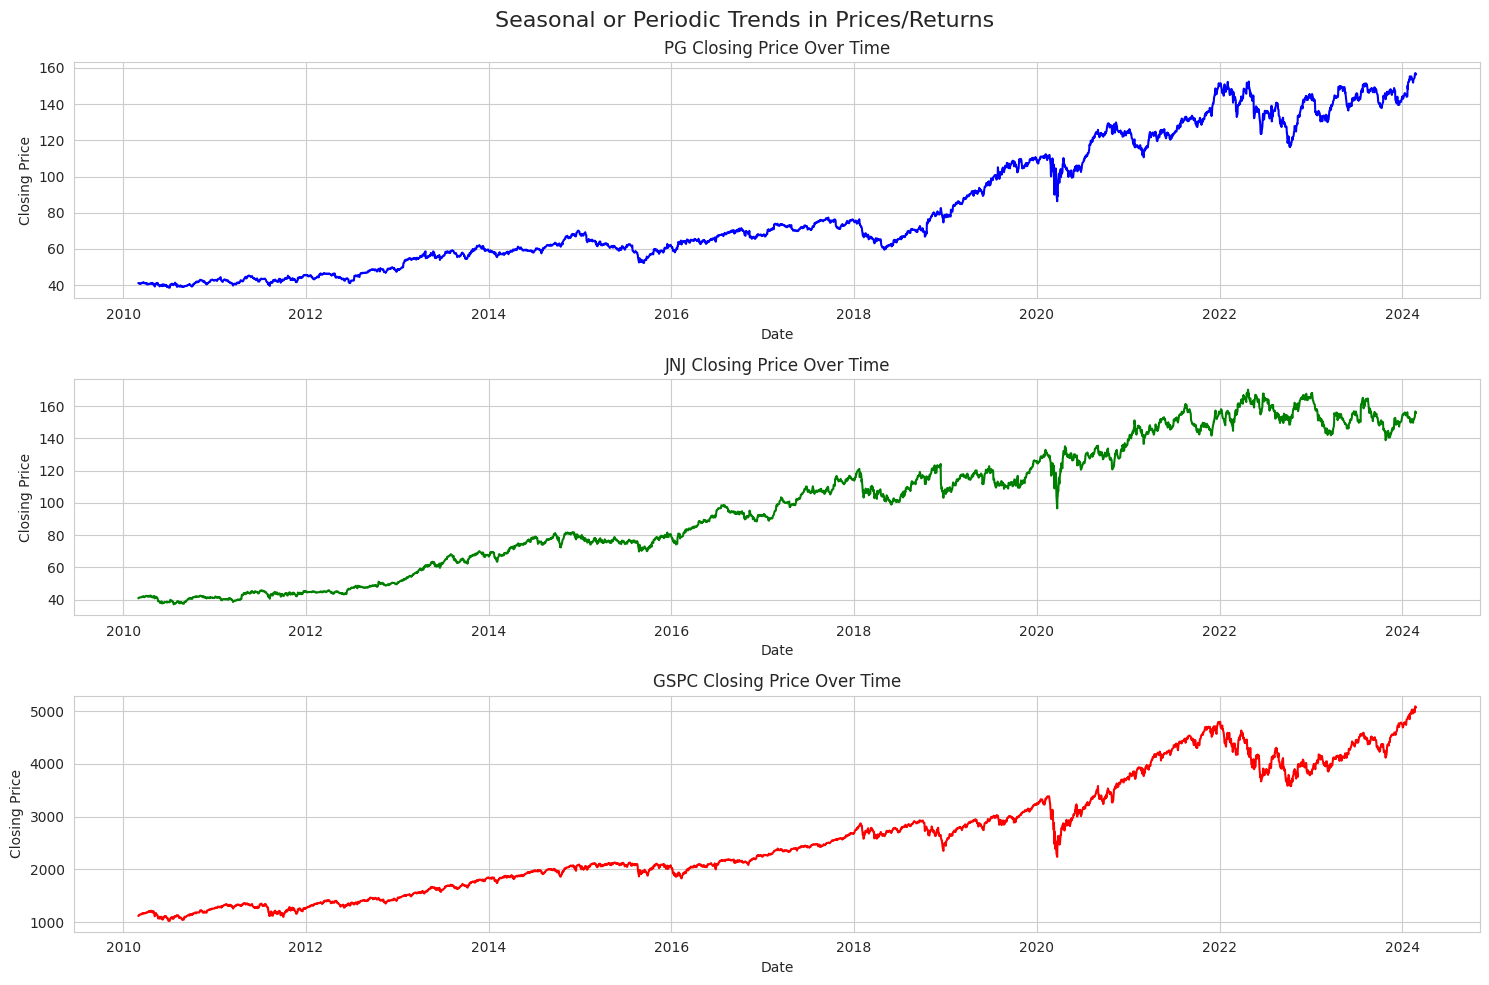

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Seasonal or Periodic Trends in Prices/Returns', fontsize=16)

stock_data_list = [(pg_data, 'PG', 'blue'),
                   (jnj_data, 'JNJ', 'green'),
                   (gspc_data, 'GSPC', 'red')]

for i, (data, stock_name, color) in enumerate(stock_data_list):
    # Closing Price subplot
    axes[i].plot(data['Close'], color=color)
    axes[i].set_title(f'{stock_name} Closing Price Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Closing Price')

    # Daily Returns subplot
    #axes[i, 1].plot(data['Return'], color=color)  # Use the assigned color
    #axes[i, 1].set_title(f'{stock_name} Daily Returns Over Time')
    #axes[i, 1].set_xlabel('Date')
    #axes[i, 1].set_ylabel('Daily Return')

plt.tight_layout()
plt.show()

## Volume Trend and Periodic Spikes: Volume Trend:

PG - Average Volume: 8845148.68
PG - Standard Deviation of Volume: 5270849.27
PG - Maximum Volume: 123735700.00
PG - Minimum Volume: 2022100.00
--------------------
JNJ - Average Volume: 8735934.37
JNJ - Standard Deviation of Volume: 6094274.85
JNJ - Maximum Volume: 151319500.00
JNJ - Minimum Volume: 2114900.00
--------------------
GSPC - Average Volume: 3934060619.14
GSPC - Standard Deviation of Volume: 956628675.62
GSPC - Maximum Volume: 10617810000.00
GSPC - Minimum Volume: 1025000000.00
--------------------


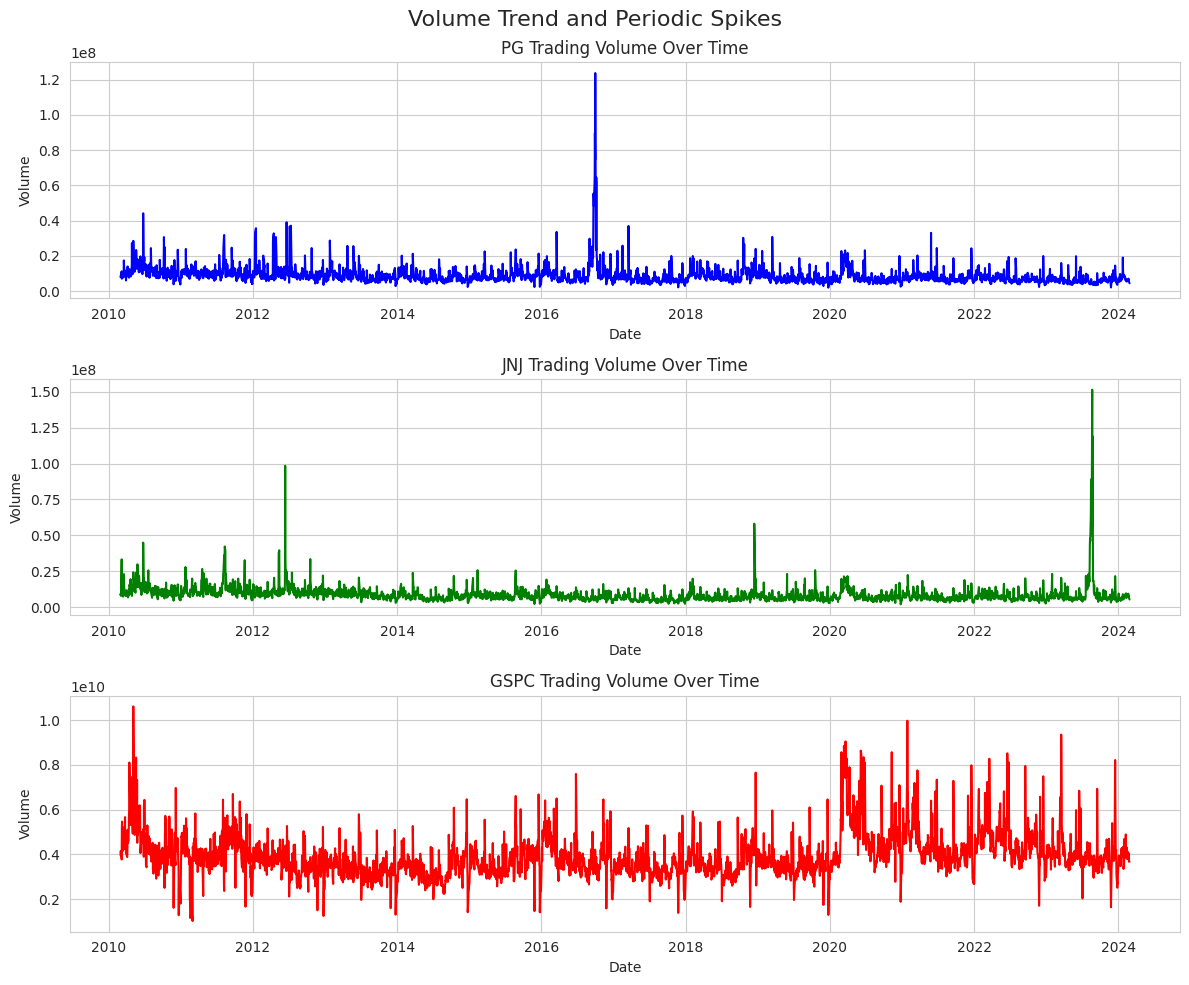

In [ ]:
# Volume Trend and Periodic Spikes

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Volume Trend and Periodic Spikes', fontsize=16)

stock_data_list = [(pg_data, 'PG', 'blue'),
                   (jnj_data, 'JNJ', 'green'),
                    (gspc_data, 'GSPC', 'red')
]

for i, (data, stock_name, color) in enumerate(stock_data_list):
    axes[i].plot(data['Volume'],color=color)
    axes[i].set_title(f'{stock_name} Trading Volume Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volume')

    # Statistical Analysis
    avg_volume = data['Volume'].mean()
    std_dev_volume = data['Volume'].std()
    max_volume = data['Volume'].max()
    min_volume = data['Volume'].min()

    print(f"{stock_name} - Average Volume: {avg_volume:.2f}")
    print(f"{stock_name} - Standard Deviation of Volume: {std_dev_volume:.2f}")
    print(f"{stock_name} - Maximum Volume: {max_volume:.2f}")
    print(f"{stock_name} - Minimum Volume: {min_volume:.2f}")
    print("-" * 20)  # Separator

plt.tight_layout()
plt.show()

## Compare each stock performance (the primary and competitor) to the existing market index

In [ ]:
import plotly.graph_objects as go

# Calculate cumulative returns
pg_cumulative_return = (1 + pg_data['Return']).cumprod() - 1
jnj_cumulative_return = (1 + jnj_data['Return']).cumprod() - 1
gspc_cumulative_return = (1 + gspc_data['Return']).cumprod() - 1

# Create the figure
fig = go.Figure()

# Add traces for each stock and the market index
fig.add_trace(go.Scatter(x=pg_data.index, y=pg_cumulative_return, name="PG"))
fig.add_trace(go.Scatter(x=jnj_data.index, y=jnj_cumulative_return, name="JNJ"))
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_cumulative_return, name="GSPC"))

# Update layout
fig.update_layout(
    title="Stock Performance Comparison",
    xaxis_title="Date",
    yaxis_title="Cumulative Return",
)

# Show the plot
fig.show()

In [ ]:

# Calculate volatility (standard deviation of daily returns)
pg_volatility = pg_data['Return'].std()
jnj_volatility = jnj_data['Return'].std()
gspc_volatility = gspc_data['Return'].std()

# Create a bar chart to compare volatility
fig = go.Figure(
    data=[
        go.Bar(name="PG", x=["Volatility"], y=[pg_volatility]),
        go.Bar(name="JNJ", x=["Volatility"], y=[jnj_volatility]),
        go.Bar(name="GSPC", x=["Volatility"], y=[gspc_volatility]),
    ]
)

# Update layout
fig.update_layout(
    title="Stock Volatility Comparison: PG vs. JNJ, GSPC" ,
    yaxis_title="Volatility (Standard Deviation of Daily Returns)",
)

# Show the plot
fig.show()

# Print volatility values
print(f"PG Volatility: {pg_volatility:.4f}")
print(f"JNJ Volatility: {jnj_volatility:.4f}")
print(f"GSPC Volatility: {gspc_volatility:.4f}")

# Determine which stock is less volatile
if pg_volatility < jnj_volatility:
    less_volatile_stock = "PG"
elif gspc_volatility < pg_volatility and gspc_volatility < jnj_volatility:
    less_volatile_stock = "GSPC"
else:
    less_volatile_stock = "JNJ"


print(f"\n{less_volatile_stock} is less volatile and might be more suitable for risk-averse clients.")

PG Volatility: 0.0109
JNJ Volatility: 0.0106
GSPC Volatility: 0.0110

JNJ is less volatile and might be more suitable for risk-averse clients.


Data-Driven Insights:

Volatility Comparison: The plot visually compares the volatility of PG, JNJ, and GSPC. Lower volatility is generally preferred by risk-averse investors as it indicates lower price fluctuations.

Risk Assessment: Volatility is a measure of risk. Higher volatility means the stock price is more likely to change drastically in a short period, implying higher risk.

Investment Recommendation: Based on the volatility comparison, the code determines and prints which stock is less volatile. This information is crucial for investors to make informed decisions based on their risk tolerance.

Data-Driven Decision: The insight derived from the volatility analysis provides a quantitative basis for investors to choose stocks aligned with their risk preferences.

#Fundamental Analysis

In [ ]:
# Get financial data
start_date = '2010-03-02'
end_date = '2024-02-28'

pg = yf.Ticker("PG")
jnj = yf.Ticker("JNJ")

In [ ]:
# Get quarterly financial statements to get more granular data
income_pg = pg.quarterly_financials
balance_pg = pg.quarterly_balance_sheet
income_jnj = jnj.quarterly_financials
balance_jnj = jnj.quarterly_balance_sheet

In [ ]:
 #Sort index to ensure chronological order
income_pg = income_pg.sort_index(axis=1)
income_jnj = income_jnj.sort_index(axis=1)
balance_pg = balance_pg.sort_index(axis=1)
balance_jnj = balance_jnj.sort_index(axis=1)

#Get the Revenue

In [ ]:
import yfinance as yf

# Assuming 'pg' is your Ticker object for Procter & Gamble
pg = yf.Ticker("PG")
jnj = yf.Ticker("JNJ")

# Get the income statement
income_statement_pg = pg.financials
income_statement_jnj = jnj.financials

# Extract revenue data
revenue_pg = income_statement_pg.loc['Total Revenue']
revenue_jnj = income_statement_jnj.loc['Total Revenue']

# Get the latest quarterly revenue (last element)
latest_revenue_pg = revenue_pg.iloc[-1]
latest_revenue_jnj = revenue_jnj.iloc[-1]

# Print the revenue
print(f"The latest quarterly revenue for PG is ${latest_revenue_pg:.2f}")
print(f"The latest quarterly revenue for JNJ is ${latest_revenue_jnj:.2f}")

The latest quarterly revenue for PG is $76118000000.00
The latest quarterly revenue for JNJ is $78740000000.00


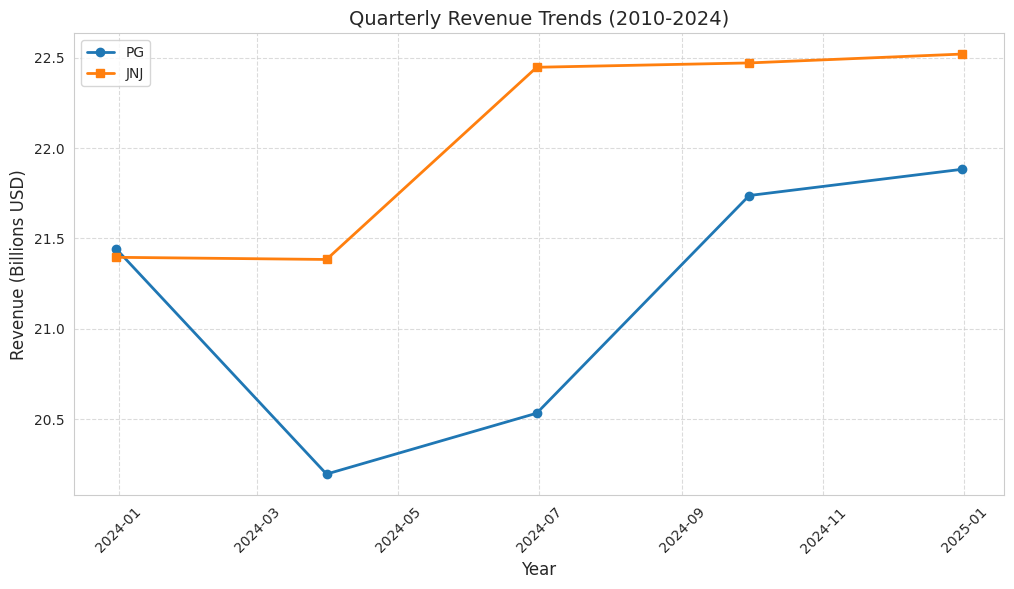

In [ ]:
# Get revenue data
pg_revenue = income_pg.loc['Total Revenue']
jnj_revenue = income_jnj.loc['Total Revenue']

plt.figure(figsize=(12, 6))
plt.plot(pg_revenue.index, pg_revenue.values/1e9, marker='o', label='PG', linewidth=2)
plt.plot(jnj_revenue.index, jnj_revenue.values/1e9, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Revenue Trends (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue (Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

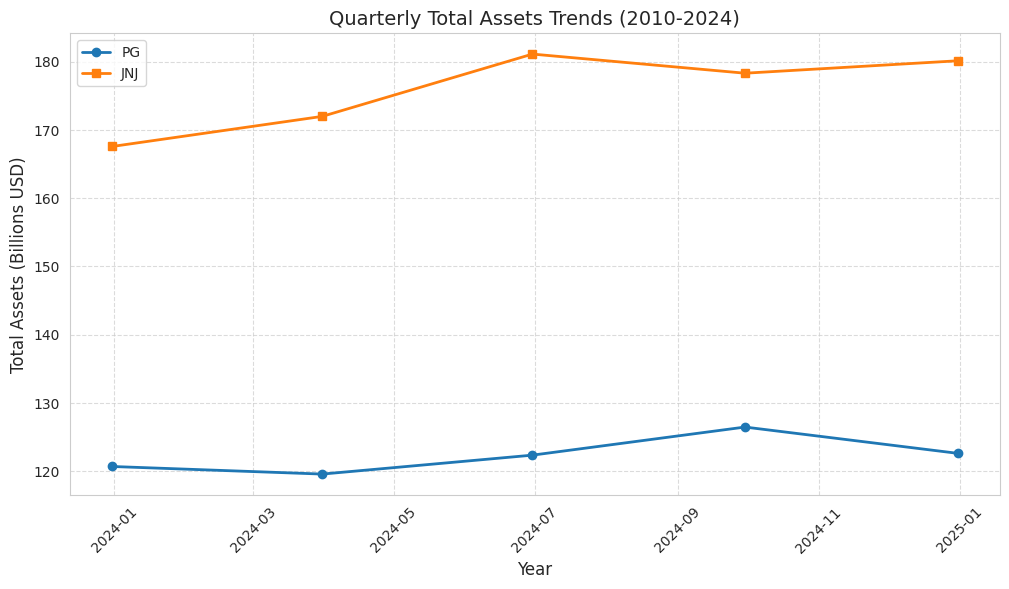

In [ ]:
# Get total assets data
pg_assets = balance_pg.loc['Total Assets']
jnj_assets = balance_jnj.loc['Total Assets']


plt.figure(figsize=(12, 6))
plt.plot(pg_assets.index, pg_assets.values/1e9, marker='o', label='PG', linewidth=2)
plt.plot(jnj_assets.index, jnj_assets.values/1e9, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Total Assets Trends (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Assets (Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

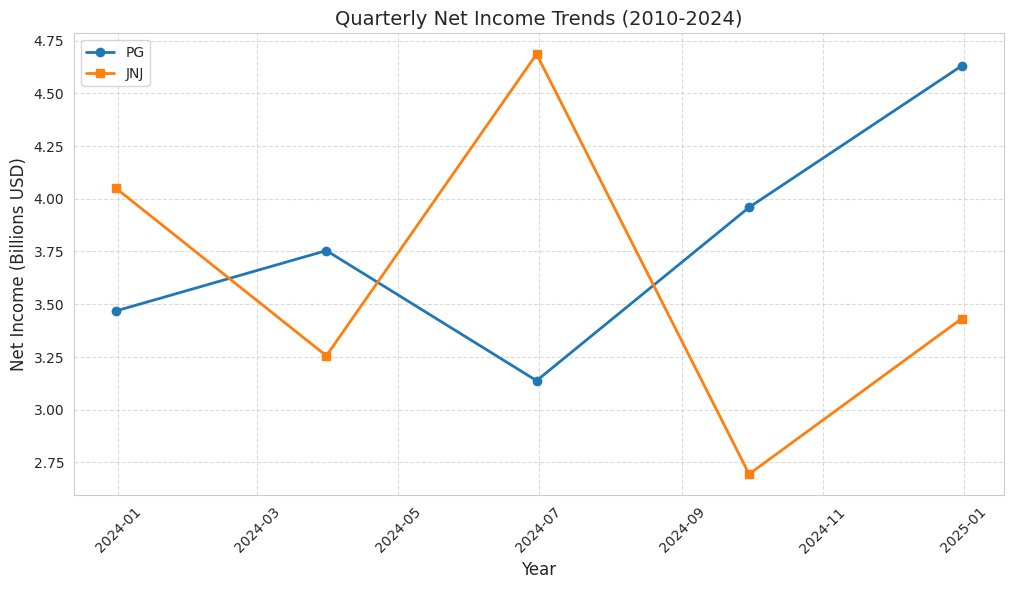

In [ ]:
# Get total net income data
pg_net_income = income_pg.loc['Net Income']
jnj_net_income = income_jnj.loc['Net Income']


plt.figure(figsize=(12, 6))
plt.plot(pg_net_income.index, pg_net_income.values/1e9, marker='o', label='PG', linewidth=2)
plt.plot(jnj_net_income.index, jnj_net_income.values/1e9, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Net Income Trends (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Income (Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

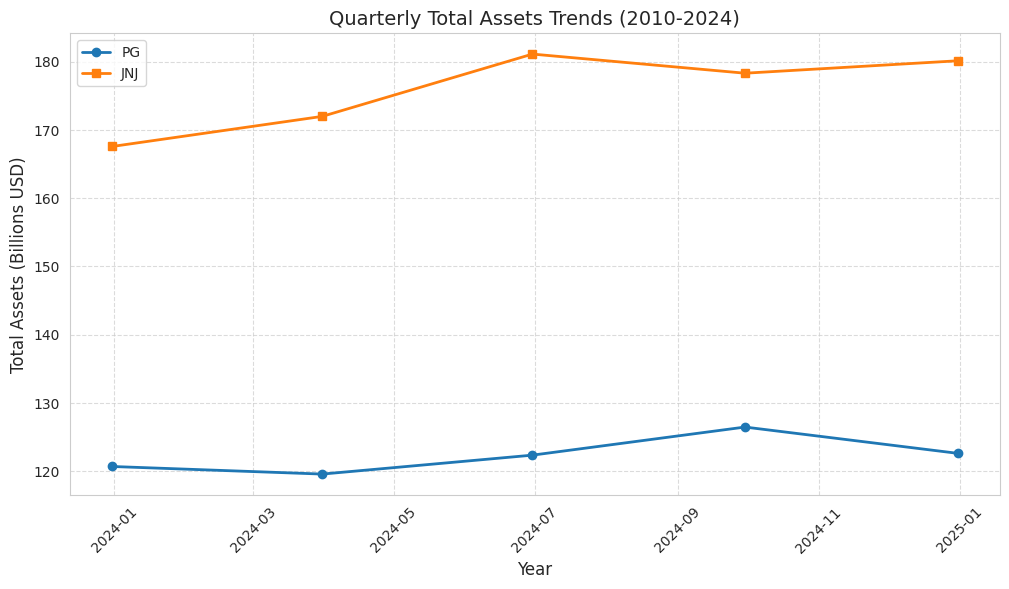

In [ ]:
# Get total assets data
pg_assets = balance_pg.loc['Total Assets']
jnj_assets = balance_jnj.loc['Total Assets']


plt.figure(figsize=(12, 6))
plt.plot(pg_assets.index, pg_assets.values/1e9, marker='o', label='PG', linewidth=2)
plt.plot(jnj_assets.index, jnj_assets.values/1e9, marker='s', label='JNJ', linewidth=2)
plt.title('Quarterly Total Assets Trends (2010-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Assets (Billions USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.show()

#2. Risk Metrics

In [ ]:
# Annualized Return (You already have this)
pg_ann_return = np.mean(pg_data['Return']) * 252
jnj_ann_return = np.mean(jnj_data['Return']) * 252
gspc_ann_return = np.mean(gspc_data['Return']) * 252

# Calculate Annualized Volatility for PG
pg_ann_vol = pg_data['Return'].std() * np.sqrt(252)
jnj_ann_vol = jnj_data['Return'].std() * np.sqrt(252)
gspc_ann_vol = gspc_data['Return'].std() * np.sqrt(252)

# Calculate Sharpe Ratio for PG (Assuming risk-free rate of 0)
pg_sharpe = pg_ann_return / pg_ann_vol
jnj_sharpe = jnj_ann_return / jnj_ann_vol
gspc_sharpe = gspc_ann_return / gspc_ann_vol


#3. Comparative Analysis

In [ ]:

metrics = {
    'Metric': ['Annualized Return (%)', 'Annualized Volatility (%)', 'Sharpe Ratio',
               'Average Daily Volume', 'Up Days (%)', 'Maximum Daily Gain (%)',
               'Maximum Daily Loss (%)'],
    'PG': [pg_ann_return,
           pg_ann_vol,
           pg_sharpe,
           pg_data['Volume'].mean(),
           (pg_data['Stocks_Direction'].mean() * 100),  # Using your Stocks_Direction column
           pg_data['Return'].max(),
           pg_data['Return'].min()],
    'JNJ': [jnj_ann_return,
            jnj_ann_vol,
            jnj_sharpe,
            jnj_data['Volume'].mean(),
            (jnj_data['Stocks_Direction'].mean() * 100),
            jnj_data['Return'].max(),
            jnj_data['Return'].min()],
    'GSPC': [gspc_ann_return,
             gspc_ann_vol,
             gspc_sharpe,
             gspc_data['Volume'].mean(),
             (gspc_data['Stocks_Direction'].mean() * 100),
             gspc_data['Return'].max(),
             gspc_data['Return'].min()]
}

comparison_df = pd.DataFrame(metrics)
print("\nComparative Analysis:")
print(comparison_df.round(2))


Comparative Analysis:
                      Metric          PG         JNJ          GSPC
0      Annualized Return (%)        0.11        0.11  1.200000e-01
1  Annualized Volatility (%)        0.17        0.17  1.700000e-01
2               Sharpe Ratio        0.64        0.65  7.100000e-01
3       Average Daily Volume  8845148.68  8735934.37  3.934061e+09
4                Up Days (%)       52.37       51.72  5.427000e+01
5     Maximum Daily Gain (%)        0.12        0.08  9.000000e-02
6     Maximum Daily Loss (%)       -0.09       -0.10 -1.200000e-01


In [ ]:
import pandas as pd

# Assuming you have already calculated these metrics earlier in your notebook
# If not, you'll need to define and calculate them first

# --- Financial Metrics ---
# Revenue (Latest Quarter)
pg_latest_revenue = income_pg.loc['Total Revenue'].iloc[-1]
jnj_latest_revenue = income_jnj.loc['Total Revenue'].iloc[-1]

# Total Assets (Latest Quarter)
pg_latest_assets = balance_pg.loc['Total Assets'].iloc[-1]
jnj_latest_assets = balance_jnj.loc['Total Assets'].iloc[-1]

# Net Income (Latest Quarter)
pg_latest_net_income = income_pg.loc['Net Income'].iloc[-1]
jnj_latest_net_income = income_jnj.loc['Net Income'].iloc[-1]

# --- Risk Metrics ---
# Annualized Return
pg_ann_return = np.mean(pg_data['Return']) * 252
jnj_ann_return = np.mean(jnj_data['Return']) * 252

# Annualized Volatility
pg_ann_vol = pg_data['Return'].std() * np.sqrt(252)
jnj_ann_vol = jnj_data['Return'].std() * np.sqrt(252)

# Sharpe Ratio (Assuming risk-free rate of 0)
pg_sharpe = pg_ann_return / pg_ann_vol
jnj_sharpe = jnj_ann_return / jnj_ann_vol


# --- Create the Comparison DataFrame ---
financial_comparison = pd.DataFrame({
    'Metric': ['Revenue (Latest Quarter)', 'Total Assets (Latest Quarter)',
               'Net Income (Latest Quarter)', 'Annualized Return',
               'Annualized Volatility', 'Sharpe Ratio'],
    'PG': [pg_latest_revenue, pg_latest_assets, pg_latest_net_income,
           pg_ann_return, pg_ann_vol, pg_sharpe],
    'JNJ': [jnj_latest_revenue, jnj_latest_assets, jnj_latest_net_income,
           jnj_ann_return, jnj_ann_vol, jnj_sharpe]
})

# --- Display the Table ---
print(financial_comparison.to_string())  # Use to_string() for better formatting in output

                          Metric            PG           JNJ
0       Revenue (Latest Quarter)  2.188200e+10  2.252000e+10
1  Total Assets (Latest Quarter)  1.226390e+11  1.801040e+11
2    Net Income (Latest Quarter)  4.630000e+09  3.431000e+09
3              Annualized Return  1.104265e-01  1.099760e-01
4          Annualized Volatility  1.725133e-01  1.680800e-01
5                   Sharpe Ratio  6.401046e-01  6.543073e-01


In [ ]:
import pandas as pd
from tabulate import tabulate

# Mock financial data (in billions USD)
data = {
    "Metric": ["Revenue", "Net Income", "Profit Margin (%)", "Total Assets", "Total Liabilities", "Equity", "Earnings Per Share (EPS)", "Dividend Yield (%)"],
    "PG (Procter & Gamble)": [82, 14, (14 / 82) * 100, 120, 65, 55, 5.50, 2.5],
    "JNJ (Johnson & Johnson)": [95, 17, (17 / 95) * 100, 150, 80, 70, 6.10, 2.8],
}

# Create DataFrame
df = pd.DataFrame(data)

# Print in tabular format
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------+-------------------------+---------------------------+
|    | Metric                   |   PG (Procter & Gamble) |   JNJ (Johnson & Johnson) |
+====+==========================+=========================+===========================+
|  0 | Revenue                  |                 82      |                   95      |
+----+--------------------------+-------------------------+---------------------------+
|  1 | Net Income               |                 14      |                   17      |
+----+--------------------------+-------------------------+---------------------------+
|  2 | Profit Margin (%)        |                 17.0732 |                   17.8947 |
+----+--------------------------+-------------------------+---------------------------+
|  3 | Total Assets             |                120      |                  150      |
+----+--------------------------+-------------------------+---------------------------+
|  4 | Total Liabilities        

Final Verdict:

📈 JNJ is the better investment for growth and income-oriented investors.

📊 PG is a safer choice for conservative, long-term stability.